## Introduction

The forest fire model clearly involves a multitude of physical factors, but the virtually unlimited variables can not all be evaluated in this project. Therefore, this research will only consider three physical attributes that can influence the spread of a fire: the varying slopes of hills and valleys, and weather factors such as wind, and possibly precipitation. All of these variables will be calculated in separate equations in order to define our percolation variable for each "cell" or each piece of vegetation. This percolation variable is the deciding factor in whether or not the fire continues to spread. Equally as important are the constants that are going to influence this experiment. 

While forest fires can have conditions that change rapidly, it is necessary to set up some constants that will set the boundaries for the model below. The first "constant" is not defined specifically, but rather a distance value that is defined within a certain range and selected in a random fashion. It is important to define this distance value because there are certain separation numbers that would be too close and unrealistic for supporting growth of vegetation. But, it is also to generate it randomly, as few trees grow the same exact distance apart, let alone an entire forest. Another constant will be the size of the "forest" in our model, as well as the rate at which ground vegetation aids the transmission of fire, including the burning temperature of different types of fuels. The ground vegetation will be assigned a simple "transferrable" or "non-transferrable" in order to limit the variables that have to be determined. Finally, the final constant will be the resources allocated to fight the fire, as human involvement cannot be discounted in this model. Therefore, a set number of fire fighting resources will be determined, as well as their effectiveness, which is limited in real life scenarios as well.

## Model

With this research, it is important to limit the amount of variables and constants, as real-world forest fires have endless factors that play a role. Most of this project doesn't require units, as the outputs are simply meant to adjust burn probability. Thus, the first equation will generate a series of burn points based on an input slope, and the spacing between vegetation which will be defined by a random generator. These burn points will be used in the percolation equation to adjust the probability that a certain spot will catch on fire. The second equation will generate another list of burn points based on the input level of wind, which can be set to vary through a separate equation that generates wind values. These wind values will again be used in the final percolation equation. The percolation will take these burn points, and output burn probabilities for each cell in the simulation, while also adjusting using the ground vegetation and resources constants. Any probability above the determined percolation constant will result in a burned cell.

## Numerical Methods

I am using a two dimensional cellular animation to display the results of a percolation equation that calculates the burn probability of a cell. This equation will utilize a combination of random number generation, adjusted probability numbers and the constants mentioned above. The boundary for my research will be the end of the simulation, which represents the time at which the fire leaves the designated region. For the slope model specifically, I will be using the quadratic equation $-.1x^2$ to represent the hill that the fire will be travelling up and down. This equation gives slope values that are easy to work with, and fits well within the boundaries of our research. Also, the slope will be taken from the derivative of the function and used directly to calculate burn probabilities.

## Code

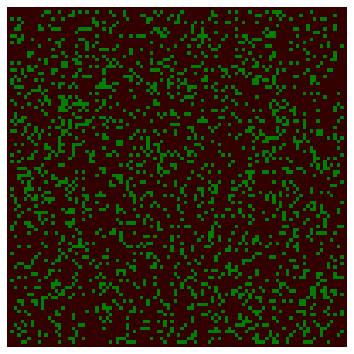

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors


#percolation_constant =                                          #the point determining if material can burn or not

#vegetation_spacing =                                            #a random list determining spacing between materials

#resources =                                                     #the impact of resources on the burn potential of cells


def ground_vegetation(x): 
    
    """Assigns a transferrable or non-transferrable designation to ground vegetation."""
    
    vegetation_list = []                                       #creates a list for burn values
    
    for h in range(x):
        
        x = h%2
        
        if x == 1:
            vegetation_list.append(2)                           #appends a burn or no burn status
        else:
            vegetation_list.append(0)
    
    return vegetation_list

#our slope equation is based on the quadtratic parabola created by -.1x^2, as the slope of this mimics a hill
def slope(x):
    
    """Based on an input tree location list (x), generates a series of burn points for percolation equation."""
    
    burn_list1 = []
    
    forest = np.linspace(-10, 10, .1)                           #creates the range of cells to be evaluated
    
    for k in forest:
        y = -.2 * float(k)
        
        y = float(y)
        
        if y > .75:
            burn_list1.append(2)                                #assigns a burn designation based on the slope
            
        elif -.75 < y < .75:
            
            r = y/.1
            
            z = r%2
            
            if z == 0:
                burn_list1.append(3)
            else:
                burn_list1.append(2)
        
        else:
            r = y/.1
            
            z = r%2
            
            if z == 0:
                burn_list1.append(0)
            else:
                burn_list1.append(3)
            

    
    return burn_list1   


#def wind(y):
    
   #"""Based on an input wind list (y), generates a series of burn points for percolation equation."""
    
    #return burn_list2


#def percolation(slope, wind):
    
    #"""Takes defined burn factors and returns final burn probabilities, adjusting for ground_vegetation and resources."""
    
    #return percolation_list


# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE, UNCERTAIN = 0, 1, 2, 3
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    if X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()

In [12]:
print(ground_vegetation(100))                                             #testing our functions

print(slope(1))

[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

In [ ]:
###### 